In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/README.md
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_129.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_133.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_136.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_127.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_132.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_121.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_134.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_122.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_125.dcm
/kaggle/input/sunnybrook-cardiac-mri/SunnyBrook-Cardiac-MR/SCD2001_005/SCD2001_MR_124.dcm
/kaggle/input/sunnybrook-cardia

In [3]:
url = 'https://assets.datacamp.com/production/repositories/2085/datasets/bbf1f4e91437f8d830880d30b31ab930578a7b4b/oasis_all_volumes.csv'
oasis = pd.read_csv(url)
oasis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                425 non-null    object 
 1   age               425 non-null    int64  
 2   sex               425 non-null    object 
 3   alzheimers        425 non-null    bool   
 4   brain_vol         425 non-null    float64
 5   skull_vol         425 non-null    float64
 6   gray_matter_vol   425 non-null    float64
 7   white_matter_vol  425 non-null    float64
 8   csf_vol           425 non-null    float64
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 27.1+ KB


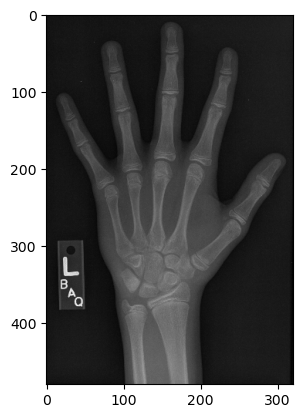

In [4]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('https://assets.datacamp.com/production/repositories/2085/datasets/61bc2353b17eb6929d6169109bff447b6d00b6bc/hand.png')
plt.imshow(image, cmap='gray')
plt.show()

#### Load images

In [5]:
# Import ImageIO
import imageio.v2 as imageio

# Load "chest-220.dcm"
im = imageio.imread('/kaggle/input/tcia-chest-ct/TCIA Chest CT (Sample)/chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


#### Meatdata

In [6]:
# Print the available metadata fields
for item in im.meta.items():
    print(item)

('TransferSyntaxUID', '1.2.840.10008.1.2')
('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2')
('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286')
('StudyDate', '20040529')
('SeriesDate', '20040515')
('ContentDate', '20040515')
('StudyTime', '115208')
('SeriesTime', '115254')
('ContentTime', '115325')
('Modality', 'CT')
('Manufacturer', 'GE MEDICAL SYSTEMS')
('StudyDescription', 'PET CT with registered MR')
('SeriesDescription', 'CT IMAGES - RESEARCH')
('PatientName', 'STS_007')
('PatientID', 'STS_007')
('PatientBirthDate', '')
('PatientSex', 'F ')
('PatientWeight', 82.0)
('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090')
('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439')
('SeriesNumber', 2)
('AcquisitionNumber', 1)
('InstanceNumber', 57)
('ImagePositionPatient', (-250.0, -250.0, -180.62))
('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0))
('SamplesPerPixel', 1)
('Rows', 51

#### Plot images

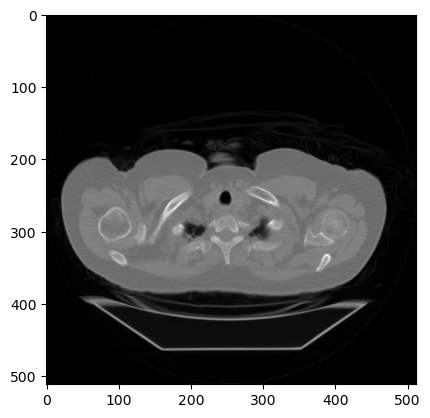

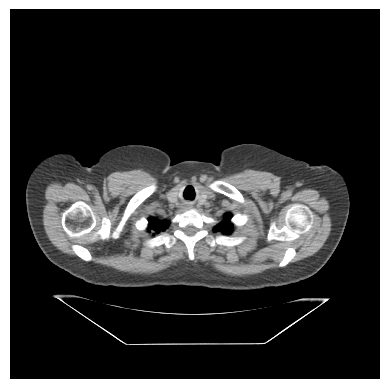

In [7]:
plt.imshow(im, cmap='gray')
plt.show()

# Draw the image with greater contrast and remove axis ticks and labels
plt.imshow(im,cmap='gray', vmin=-200,vmax=200)
plt.axis('off')
plt.show()

### N-dimensional images

In [8]:
import imageio.v2 as iio

# Read in each 2D image
im1 = iio.imread('/kaggle/input/tcia-chest-ct/TCIA Chest CT (Sample)/chest-220.dcm')
im2 = iio.imread('/kaggle/input/tcia-chest-ct/TCIA Chest CT (Sample)/chest-221.dcm')
im3 = iio.imread('/kaggle/input/tcia-chest-ct/TCIA Chest CT (Sample)/chest-222.dcm')
im4 = iio.imread('/kaggle/input/tcia-chest-ct/TCIA Chest CT (Sample)/chest-224.dcm')
im5 = iio.imread('/kaggle/input/tcia-chest-ct/TCIA Chest CT (Sample)/chest-225.dcm')

# Stack images into a volume
vol = np.stack((im1, im2, im3, im4, im5), axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (5, 512, 512)


In [9]:
im1.shape

(512, 512)

### Advanced plotting
#### Generate subplots

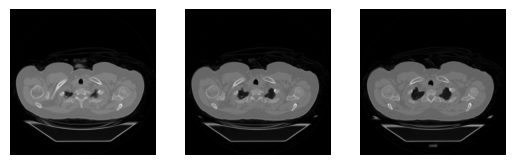

In [10]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=1, ncols=3)

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

Great work! For even more rapid visualization, you can use a large number of subplots and loop through your axes and images.

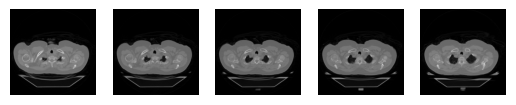

In [11]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=5)

# Loop through subplots and draw image
for ii in range(5):
    im = vol[ii, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

#### Plot other views

In [12]:
vol.shape

(5, 512, 512)

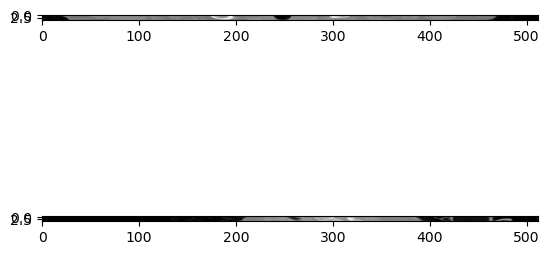

In [13]:
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
plt.show()

Number of actual images are to low to show clear picture, need more CT images of patient ie. (125, 512, 512), but essentially code works

## Masks and Filters
Cut image processing to the bone by transforming x-ray images. You'll learn how to exploit intensity patterns to select sub-regions of an array, and you'll use convolutional filters to detect interesting features. You'll also use SciPy's ndimage module, which contains a treasure trove of image processing tools.
### Image intensities
#### Intensity

In [14]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include:
    1. Turning off axis grids. 
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    fig.axes[0].axis('off')
    plt.tight_layout()
    plt.show()

To start, let's load the image and check its intensity range.

The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

Data type: uint8
Min. value: 3
Max value: 224


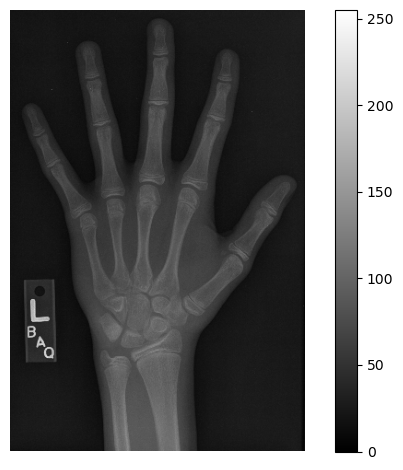

In [15]:
# Load the hand radiograph
im = iio.imread('https://assets.datacamp.com/production/repositories/2085/datasets/61bc2353b17eb6929d6169109bff447b6d00b6bc/hand.png')

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
format_and_render_plot()

Although only a coarse descriptor, the range of intensities can help you get a quick feel for your image's content.

#### Histograms
Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.

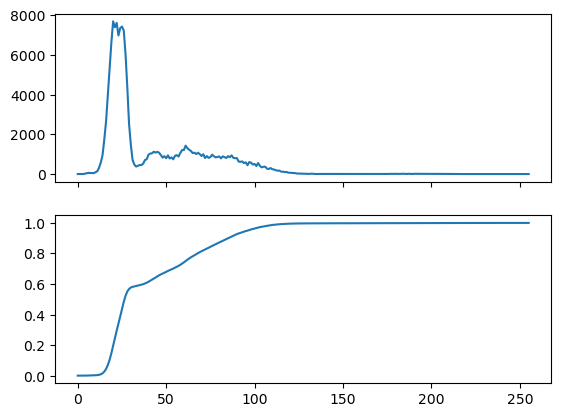

In [19]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
# First, find the cumulative sum of hist, then divide by the total number of pixels in hist
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
plt.show()

You can see the data is clumped into a few separate distributions, consisting of background noise, skin, bone, and artifacts. Sometimes we can separate these well with global thresholds (foreground/background); other times the distributions overlap quite a bit (skin/bone)